# Streamlining code
- extract data from CSV to create a `geopandas.GeoDataFrame`
- do more map customicaations for maps and matplotlib figs
- go over strats for streamlining code

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt


# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Drop first columns

power_plants = power_plants.drop(columns="Unnamed: 0")
power_plants.head()


,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900


In [3]:
# Import states data
fp = os.path.join("data", "tl_2022_us_state", "tl_2022_us_state.shp")
states = gpd.read_file(fp)

# SImplify col names
states.columns = states.columns.str.lower()
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


# Make CSV into geospatial data

The power plants data is a csv, unlike shapefiles, `geopandas` doesn't have a way to extract a geometry column from CSV so we need to specify it manually

We will use lat and lon in the CSV indicating location of power plants in NAD83 CRS (EPSG:4259)


In [4]:
# Create points from lat and on
# Returns an array initially 
points = gpd.points_from_xy(power_plants.longitude, power_plants.latitude)

# Create geodataframe


In [5]:
#Overwrite power plant data with spatial geometry
power_plants = gpd.GeoDataFrame(power_plants, # Data
                  geometry = points, # Specify geom col
                  crs= 'EPSG:4269') # Specify crs

<Axes: >

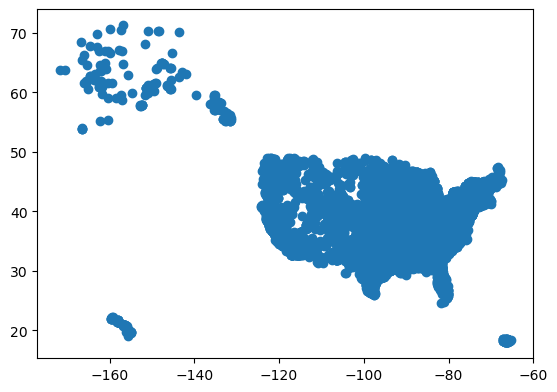

In [6]:
power_plants.plot()

# f-strings

We have printed variables with string concatenation inside `print()` function writing commas between every string and variable we want to print 
EX:

In [7]:
print('CRS:', power_plants.crs )

CRS: EPSG:4269


f-strings: formatted string: the simplex syntax is
```default
f" some text {replace}"
```

{replace} can be a variable, an expression, a function, or a method call

In [8]:
# Explore crs 
print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS geographic?': <25} {power_plants.crs.is_geographic} ")
print(f"{'Is the CRS projected?': <25} {power_plants.crs.is_projected} ")


Is the CRS geographic?    True 
Is the CRS projected?     False 


## Explore tiger shapefile

Preliminary information about the states geodataframe


In [10]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

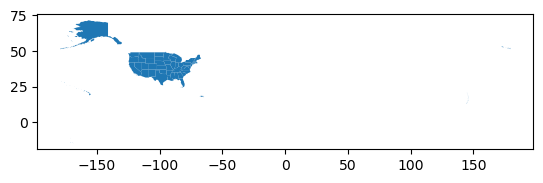

In [11]:
print(states.crs)
states.plot()

## Working with `for` loops

it can be easier to work with codes as numbers instead of strings, update corresponding column sin the states geodataframe

In [12]:
# Examine if the region, division, statefp column are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"region is string dtype? {is_string_dtype(states['division'])}")
print(f"region is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
region is string dtype? True
region is string dtype? True


This is inconvenient! it repeats the same code over and over with only changing the column name

Use a for loop

In [13]:
code_cols = ['region', 'division', 'statefp']

# Check whether the code columns are string types
for column in code_cols:
    print(f"region is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
region is string dtype? True
region is string dtype? True


**DRY code**

DON'T REPEAT YOURSELF= core programming tenet that reduces redundancy in code, consolidate logic

## `assert` 
keyword does nothing if the expression next to it evaluates to `True` and it raises an `AssertionError` excpetion and stops code from running further if not

In [14]:
# Does nothing if the statement is True
assert 2+2 == 4

# Raises an error if the statement is False
assert 2+2 == 3

AssertionError: 

A workflow for updating dtype of code columns to be integers:
for each column in code_columns:
convert column to numeric
check if column is numeric using assert

In [ ]:
# Update the code column into integers 
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])


## Data Selection
For this lesson, we want to use only data for the contiguous US states
Data covers a larger extent

In [ ]:
states.plot()
# This looks ridiculous- keep only contiguous area

## Check in 
1. What are the unqiue values for region, division, state codes in the data? 
2. Which codes should we select to keep only contiguous area?

In [ ]:
states["region"].unique()
states["division"].unique()
states["statefp"].unique()

In [15]:
contiguous = states[(states["region"]!=9) & 
                    (~states.statefp.isin([2,15]))]


In [ ]:
contiguous.plot()

THe ~ is used to negate a states
## Check in

Select data in `power_plants` for the contiguous US

In [ ]:
power_plants.state.unique()


<Axes: >

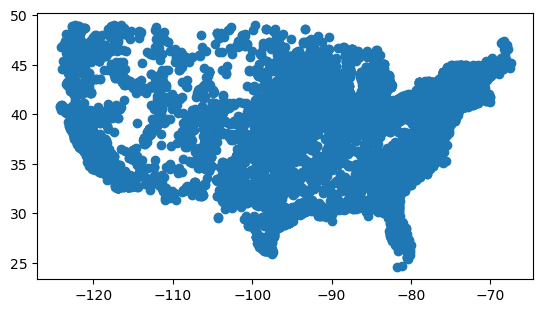

In [16]:

sub_plants = power_plants[(~power_plants.state.isin(["Alaska", "Hawaii", "Puerto Rico"]))]
sub_plants.plot()

## Plotting

Before plotting data we need to make sure they are in the same CRS

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) # Update base figure size

# Remove the axis for  a cleaner map
ax.axis("off")

# Title
ax.set_title("Operable Electric Generating Plants in the Contiguous US", 
             fontsize = 15)

# Add states
contiguous.plot(ax=ax, color = "none")

# Add power plants colored by energy source
sub_plants.plot(ax=ax, column="primsource", 
                legend=True, 
                markersize=4, 
                cmap="tab20", 
                alpha=0.5, 
                legend_kwds={
                    "title":"Primary energy source", 
                    "title_fontsize":"small", 
                    "fontsize":"small", 
                    "loc":"upper left", 
                    "bbox_to_anchor":(0,0), 
                    "ncol":6
                })

plt.show()


## `for` with `zip`

Often we need to iterate simultaneously over two lists or iterables

`zip()` is a python function that allows you to combine two lists so that you can iterate ove rtheir elements in pairs. When used in a for loop 

In [ ]:
# Iterate over a single list
numbers = [1,2,3]

for num in numbers:
    print(num+1)

In [ ]:
# Iterate over two lists in pairs using zip()
letters = ["a", "b", "c"]

for num, letter in zip(numbers, letters):
    print(num+1, letter)

A common situation when code gets repeated is when creating subplots

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

axes[0].set_title("This is axis 0")
axes[1].set_title("This is axis 1")
axes[2].set_title("This is axis 2")

plt.show()

## Check in
automate this into a for loop

In [ ]:
# Use zip to create the same subplots and avoid redundancy
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axis {i}")

plt.show()

# Exercise
1. select the power plants in CA in a variable called ca_power_plants
2. create a list named top_sources with CA's top 3 electric primary sources
3. Isolate the state boundary with an object ca_boundary
4. recreate plot

In [17]:
#1 
ca_power_plants = sub_plants[sub_plants["state"] == "California"]
ca_power_plants

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,23500,66472,San Manuel Central Plant Cogens,65525,San Manuel Mission Band of Indians,Industrial CHP,777 San Manuel Blvd.,Highland,San Bernardino,California,92346.0,natural gas,Natural Gas = 5 MW,Natural Gas Internal Combustion Engine,5.4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.230250,34.151193,POINT (-117.23025 34.15119)
11942,23511,66492,Henry Miller RD,65537,Henry Miller Reclamation District,Commercial Non-CHP,7767 Santa Rita Grade,Dos Palos,Merced,California,93620.0,solar,Solar = 1.5 MW,Solar Photovoltaic,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.635230,37.054300,POINT (-120.63523 37.05430)
11944,23513,66500,Valley Center 85,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 85 MW,Batteries,85.0,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)
11946,23515,66502,Valley Center 54,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 54 MW,Batteries,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)


In [18]:
# 3
top3 = ["solar", "natural gas", "hydroelectric"]
top3

['solar', 'natural gas', 'hydroelectric']

In [19]:
ca_boundary = states[states.statefp.isin([6])]

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

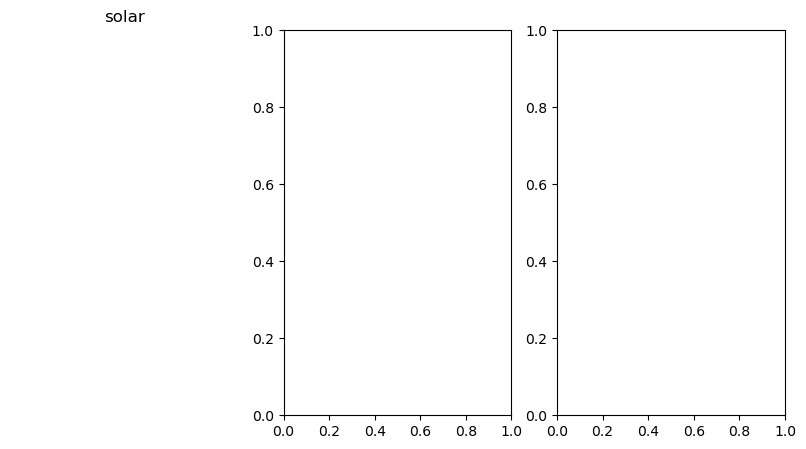

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

for ax, i in zip(axes, top3):
    ax.set_title(i)
    ax.axis("off")
    ca_boundary.plot(ax=axes, color = "none", edgecolor = "red")
    ca_power_plants[ca_power_plants["primsource"] == i].plot(ax=axes, column="primsource", color= "red")
    
plt.show()